# Projeto Chocolate

Verificar a distribuição de valores em cada variável para identificar quais variáveis são categóricas e quais são numéricas. Além disso, você pode verificar a presença de possíveis valores atípicos (outliers) e decidir se eles precisam ser tratados ou não.

Explorar as relações entre pares de variáveis, por exemplo, usando um gráfico de dispersão ou um mapa de calor de correlação. Isso pode ajudar a identificar padrões ou relacionamentos entre variáveis que podem ser úteis para análises futuras.

Realizar análises estatísticas para determinar se há alguma relação significativa entre as variáveis. Por exemplo, você pode usar um teste de hipótese para determinar se a avaliação de um chocolate está relacionada à sua origem ou à porcentagem de cacau.

Criar visualizações para ajudar a comunicar suas descobertas de maneira clara e concisa. Isso pode incluir gráficos de barras, gráficos de dispersão, mapas de calor, etc.

Identificar possíveis oportunidades para criar modelos preditivos. Por exemplo, você pode tentar prever a classificação de um chocolate com base em suas características, como a porcentagem de cacau, a origem do feijão, etc.

Finalmente, é importante documentar e compartilhar seus resultados para garantir que outras pessoas possam entender e reproduzir suas análises. Isso pode incluir relatórios, visualizações interativas, notebooks Jupyter, etc.

## Importando as bibliotecas e abrindo o arquivo

In [86]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
# abrindo o arquivo
data = pd.read_csv('chocolate_bars.csv')

## Descrição da base de dados

In [88]:
# quantidade de linhas e colunas
print(f'O dataset contém {data.shape[0]} linhas e {data.shape[1]} colunas')

O dataset contém 2530 linhas e 11 colunas


In [89]:
# visualizando as primeiras linhas
data.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [90]:
# tipo de cada variável
data.dtypes

id                    int64
manufacturer         object
company_location     object
year_reviewed         int64
bean_origin          object
bar_name             object
cocoa_percent       float64
num_ingredients     float64
ingredients          object
review               object
rating              float64
dtype: object

In [91]:
# verificando se existem valores nulos no dataframe
np.sum(pd.isna(data))

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [92]:
# selecionando apenas as linhas com valores nulos
mask = data['num_ingredients'].isna()
data_nulos = data[mask]
data_nulos

# verificou-se que as linhas com num_ingredients nulos são as mesmas que ingredients nulos

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
85,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70.0,NaN,NaN,"raisins, pungent",3.00
86,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70.0,NaN,NaN,"few grits, blackcherry, licorice",3.50
164,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100.0,NaN,NaN,"very nutty, very bitter",1.75
293,81,Bonnat,France,2006,Blend,One Hundred,100.0,NaN,NaN,"acidic, bitter, dry",1.50
323,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100.0,NaN,NaN,"cardboard, very bitter, floral",1.50
...,...,...,...,...,...,...,...,...,...,...,...
2424,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",100.0,NaN,NaN,"bland, mild fruit, strong bitter",2.00
2425,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",90.0,NaN,NaN,"some fruit, strong bitter",2.00
2426,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",75.0,NaN,NaN,"cocoa,earthy,very astringent",3.00
2447,733,Whittakers,New Zealand,2011,Ghana,Ghana,72.0,NaN,NaN,"sticky, dry, vanilla dominates",2.50


In [93]:
# selecionando apenas as linhas sem valores nulos
data = data.dropna()
data

# justificativa para exclusão das linhas: 
# as características com valores nulos não são possíveis de serem inferidas a partir dos outros atributos.

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


In [94]:
# excluindo a coluna 'id'
data = data.drop('id', axis=1)

## 

In [95]:
# trocando os nomes das colunas
data.columns = ['fabricante', 'local_fabricante', 'ano_avaliação', 'origem_cacau', 'nome_chocolate', 'percentual_cacau', 'num_ingredientes', 'ingredientes', 'avaliação', 'nota']
data

,fabricante,local_fabricante,ano_avaliação,origem_cacau,nome_chocolate,percentual_cacau,num_ingredientes,ingredientes,avaliação,nota
0,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


In [96]:
# estatísticas descritivas das variáveis numéricas
data.describe(exclude = ['int','object']).T

,count,mean,std,min,25%,50%,75%,max
percentual_cacau,2443.0,71.496725,5.156974,42.0,70.0,70.00,74.0,100.0
num_ingredientes,2443.0,3.041343,0.913728,1.0,2.0,3.00,4.0,6.0
nota,2443.0,3.210090,0.428370,1.0,3.0,3.25,3.5,4.0


In [97]:
# dividindo a coluna 'ingredientes' em 7 colunas
# B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, Sa (Salt)

# criando um dataframe auxiliar com as 7 colunas
data_bool = data['ingredientes'].str.get_dummies(sep=',')

# concatenando os dataframes
data2 = pd.concat([data, data_bool], axis=1)

In [98]:
# removendo a coluna 'ingredientes'
data2 = data2.drop('ingredientes', axis=1)

In [99]:
# renomeando as colunas booleanas dos ingredientes
df = data2.rename(columns={'B': 'cacau', 'C': 'manteiga_cacau', 'L': 'lecitina', 'S': 'açúcar', 'S*': 'adoçante', 'Sa': 'sal', 'V': 'baunilha'})
df

,fabricante,local_fabricante,ano_avaliação,origem_cacau,nome_chocolate,percentual_cacau,num_ingredientes,avaliação,nota,cacau,manteiga_cacau,lecitina,açúcar,adoçante,sal,baunilha
0,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"rich cocoa, fatty, bready",3.25,1,1,0,1,0,0,0
1,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"cocoa, vegetal, savory",3.50,1,1,0,1,0,0,0
2,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"cocoa, blackberry, full body",3.75,1,1,0,1,0,0,0
3,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"chewy, off, rubbery",3.00,1,1,0,1,0,0,0
4,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"fatty, earthy, moss, nutty,chalky",3.00,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"waxy, cloying, vegetal",2.75,1,1,0,0,1,1,0
2526,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"strong nutty, marshmallow",3.75,1,1,0,1,0,0,0
2527,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"fatty, earthy, cocoa",3.00,1,1,0,1,0,0,0
2528,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"fatty, mild nuts, mild fruit",3.25,1,1,0,1,0,0,0


# Análise Exploratória

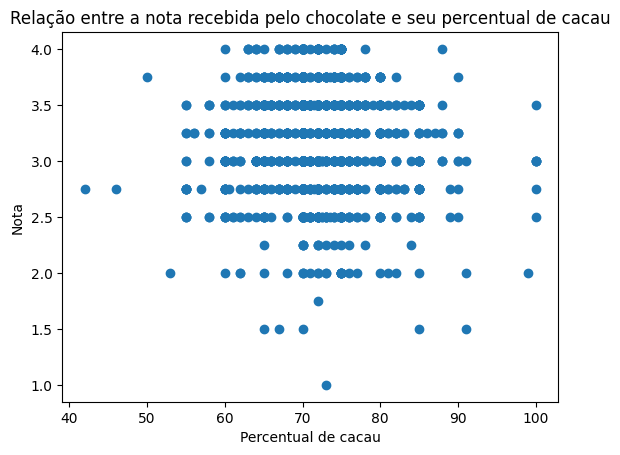

In [102]:
# gráfico de dispersão
plt.scatter(df['percentual_cacau'], df['nota'])
plt.title("Relação entre a nota recebida pelo chocolate e seu percentual de cacau")
plt.xlabel("Percentual de cacau")
plt.ylabel("Nota")
plt.show()

Não é possível verificar uma relação entre a nota do chocolate e seu percentual de cacau. \
A maior parte dos chocolates avaliados possui de 60 a 80% de cacau, mas suas notas variam entre 1 e 4, não sendo possível fazer conclusões efetivas.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a492cc0ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a492cc1810>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a492cc2950>],
 'medians': [<matplotlib.lines.Line2D at 0x1a491c69a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a492cc3fd0>],
 'means': []}

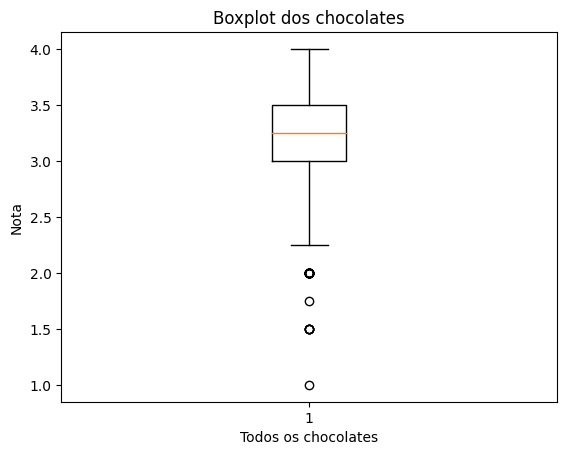

In [103]:
# boxplot da coluna 'nota'
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot dos chocolates')
ax1.set_xlabel('Todos os chocolates')
ax1.set_ylabel('Nota')
ax1.boxplot(df['nota'])

Podemos notar que 50% dos chocolates possuem notas entre 3 e 3,5. \
Existem alguns outliers representados por chocolates com notas inferiores a 2,25 aproximadamente. \
Além disso, percebe-se uma distribuição relativamente simétrica, com valores variando entre 2,25 e 4 e média em torno de 3,25.